### Inspect cleaned and preprocessed data

In [2]:
import sys
import os

# Get the path to the project root (adjust the number of '..' as needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the project root to the system path
if project_root not in sys.path:
    sys.path.append(project_root)
print("Project root added to sys.path:", project_root)

Project root added to sys.path: /Users/admin/Desktop/Data Science/Trading-Bot


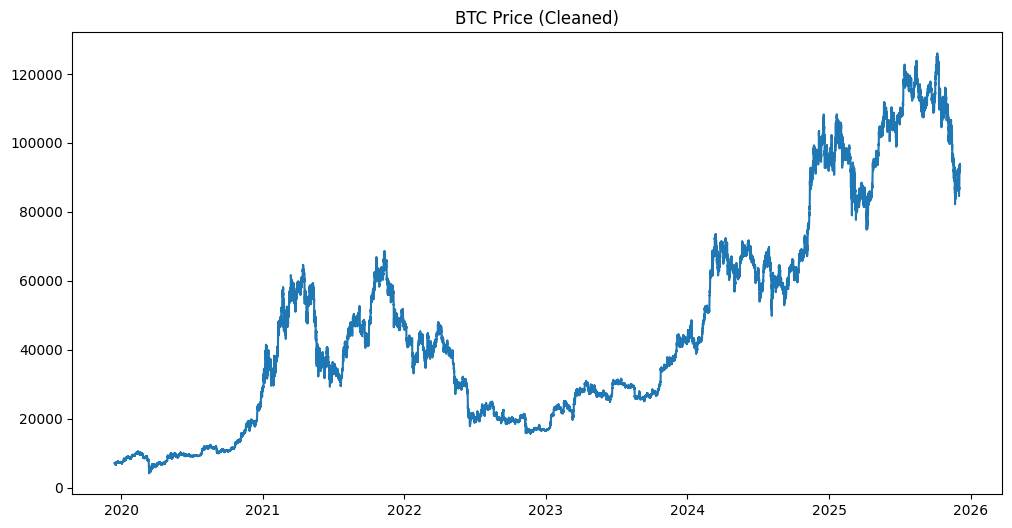

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet("../data/processed/btc_1h.parquet")

df.head()
df.describe()

plt.figure(figsize=(12,6))
plt.plot(df["datetime"], df["close"])
plt.title("BTC Price (Cleaned)")
plt.show()


In [2]:
import pandas_ta as ta # Technical Analysis library
df.ta.ema(close='close', length=12, append=True) #checking how this function works
df.head()

,datetime,open,high,low,close,volume,return,log_return,EMA_12,EMA_26,...,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0,EMA_20,OBV,hour,day_of_week,is_weekend
0,2019-12-15 03:00:00+00:00,7061.46,7067.03,7044.09,7056.97,688.958184,-0.000712,7056.97,NaN,7120.423697,...,6995.572169,7104.6950,7213.817831,3.071851,0.281324,1173.272898,-31493.994431,0,3,0
1,2019-12-15 04:00:00+00:00,7057.49,7067.03,7053.00,7053.72,388.784188,-0.000461,7053.72,NaN,7115.482682,...,6994.234331,7097.9080,7201.581669,2.921246,0.286889,1098.559687,-31882.778619,0,3,0
2,2019-12-15 05:00:00+00:00,7054.30,7062.81,7044.00,7058.00,454.484715,0.000607,7058.00,NaN,7111.224706,...,6996.116015,7091.2260,7186.335985,2.682469,0.325329,1037.219214,-31428.293904,0,3,0
3,2019-12-15 06:00:00+00:00,7058.10,7058.14,7035.37,7054.68,828.537262,-0.000470,7054.68,NaN,7107.036209,...,7000.415999,7084.4365,7168.457001,2.371974,0.322921,1017.344742,-32256.831166,0,3,0
4,2019-12-15 07:00:00+00:00,7055.55,7200.30,7035.63,7142.00,5010.399752,0.012378,7142.00,NaN,7109.626119,...,7007.622695,7082.2395,7156.856305,2.107153,0.900449,1397.635695,-27246.431414,0,3,0


In [5]:
df[[
    "EMA_12",
    "EMA_26",
    "SMA_50",
    "SMA_200",
    "MACD_12_26_9",
    "MACDh_12_26_9",
    "MACDs_12_26_9",
    "RSI_14",
    "ATRr_14",
    "BBL_20_2.0_2.0",
    "BBM_20_2.0_2.0",
    "BBU_20_2.0_2.0",
    "BBB_20_2.0_2.0",
    "BBP_20_2.0_2.0",
    "EMA_20",
    "OBV",
    "hour",
    "day_of_week",
    "is_weekend"
]].tail()


,EMA_12,EMA_26,SMA_50,SMA_200,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,ATRr_14,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0,EMA_20,OBV,hour,day_of_week,is_weekend
52315,93228.309713,92796.217847,91589.5128,90147.84900,432.091866,-132.136291,564.228157,54.306277,736.789655,92164.517432,93088.0135,94011.509568,1.984135,0.528547,972.663913,1.260635e+06,0,3,0
52316,93254.365142,92840.769858,91717.3022,90177.98755,413.595284,-120.506299,534.101582,56.779705,721.689679,92174.881953,93107.6130,94040.344047,2.003555,0.655488,944.222484,1.261309e+06,0,3,0
52317,93255.328966,92871.870609,91840.7056,90206.42315,383.458357,-120.514581,503.972937,55.067502,709.825417,92192.261986,93123.7750,94055.288014,2.000591,0.573458,893.523397,1.260897e+06,0,3,0
52318,93286.001433,92915.043157,91969.5466,90234.08695,370.958276,-106.411729,477.370005,57.043066,686.681458,92196.749637,93139.9660,94083.182363,2.025374,0.666841,846.795982,1.261300e+06,0,3,0
52319,93286.545828,92942.783664,92105.8996,90261.97555,343.762164,-106.886273,450.648437,54.833496,662.410640,92316.887052,93186.5660,94056.244948,1.866533,0.559202,796.196813,1.260984e+06,0,3,0


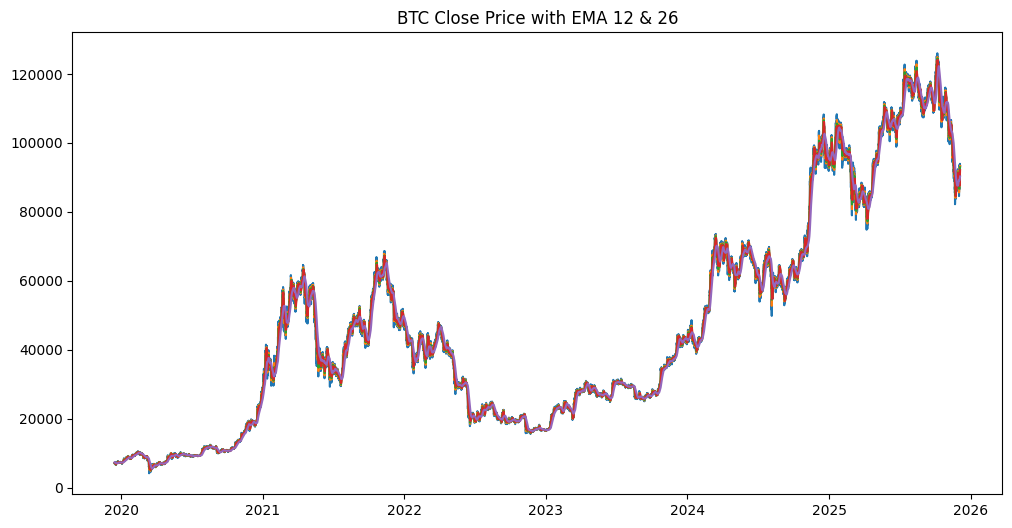

In [10]:
#df[["close","EMA_12","EMA_26", "SMA_50", "SMA_200"]].plot(figsize=(12,5))
#plt.title("BTC Close Price with EMA 12 & 26")
#plt.show()

plt.figure(figsize=(12,6))
plt.plot(df["datetime"], df[["close","EMA_12","EMA_26", "SMA_50", "SMA_200"]])
plt.title("BTC Close Price with EMA 12 & 26")
plt.show()

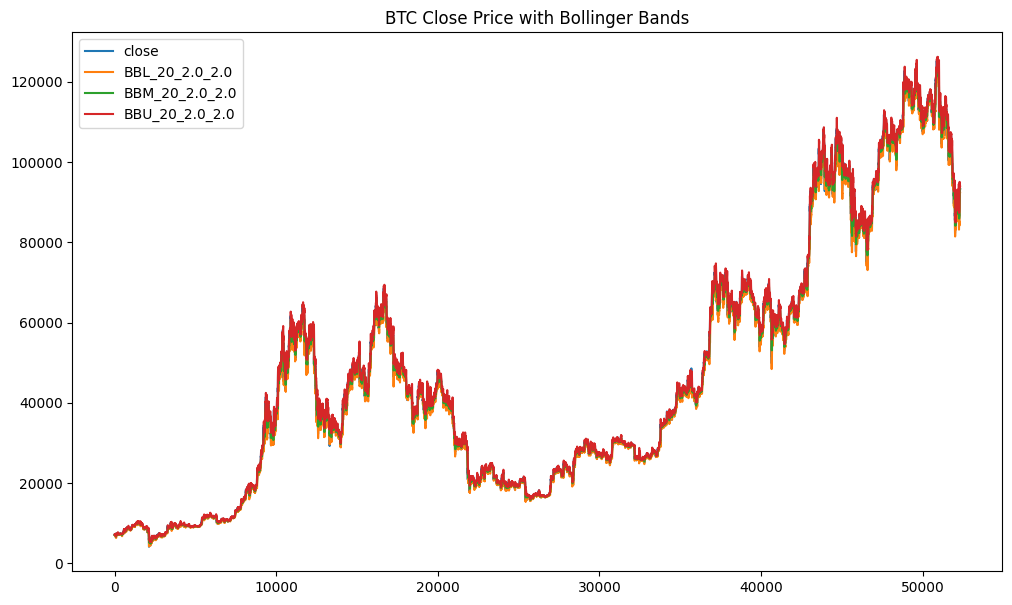

In [12]:
df[["close","BBL_20_2.0_2.0","BBM_20_2.0_2.0", "BBU_20_2.0_2.0"]].plot(figsize=(12,7))
plt.title("BTC Close Price with Bollinger Bands")
plt.show()

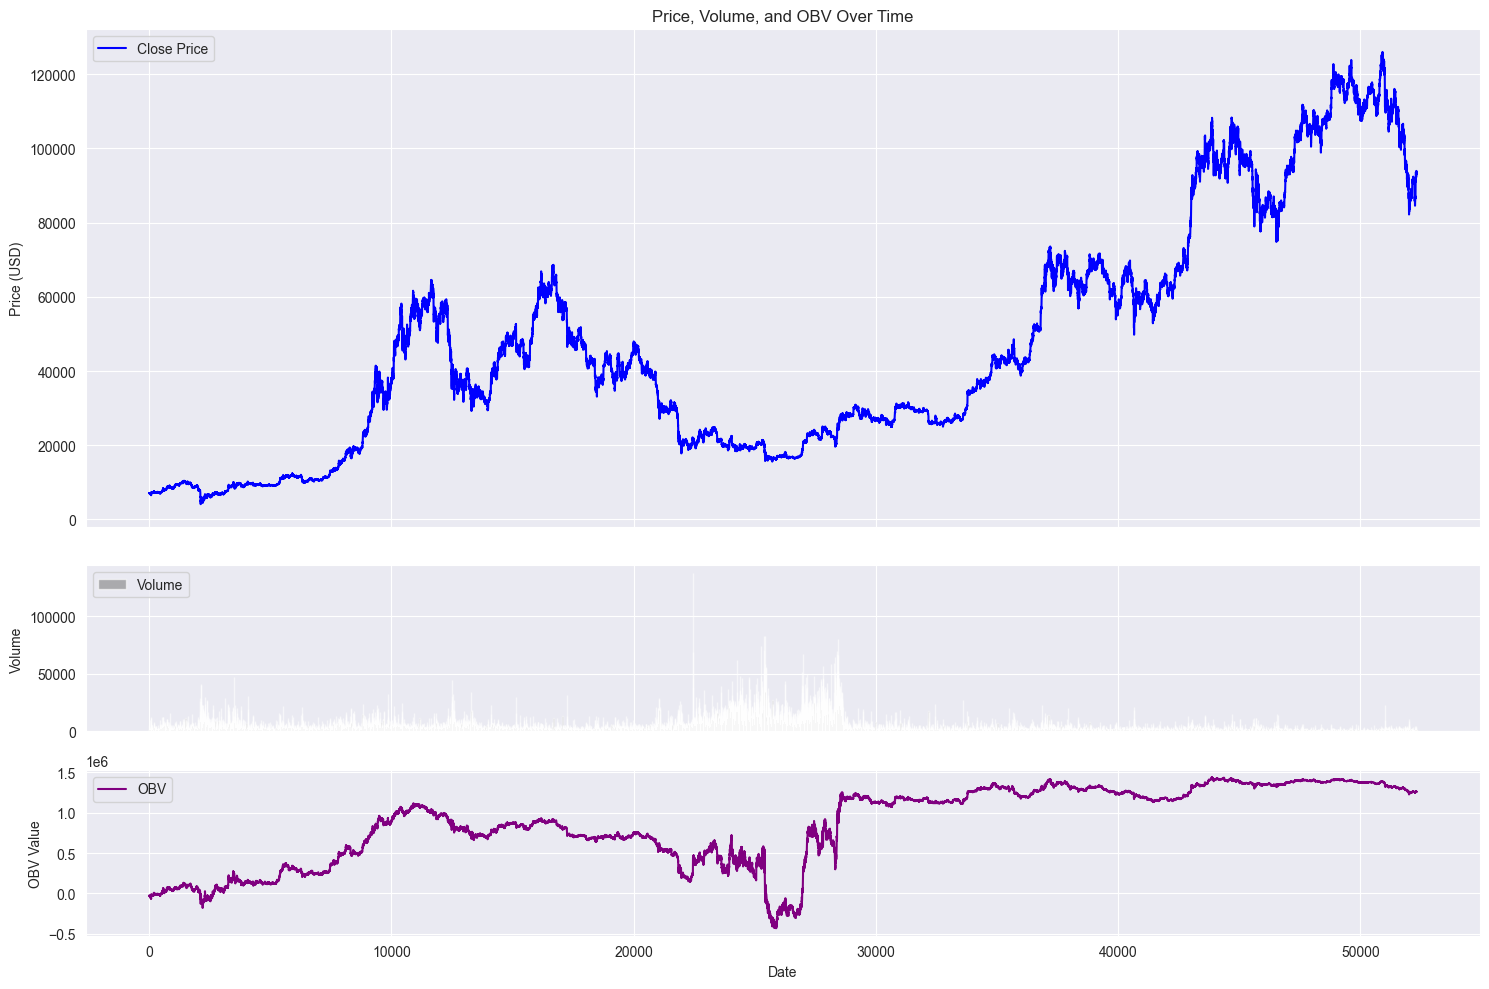

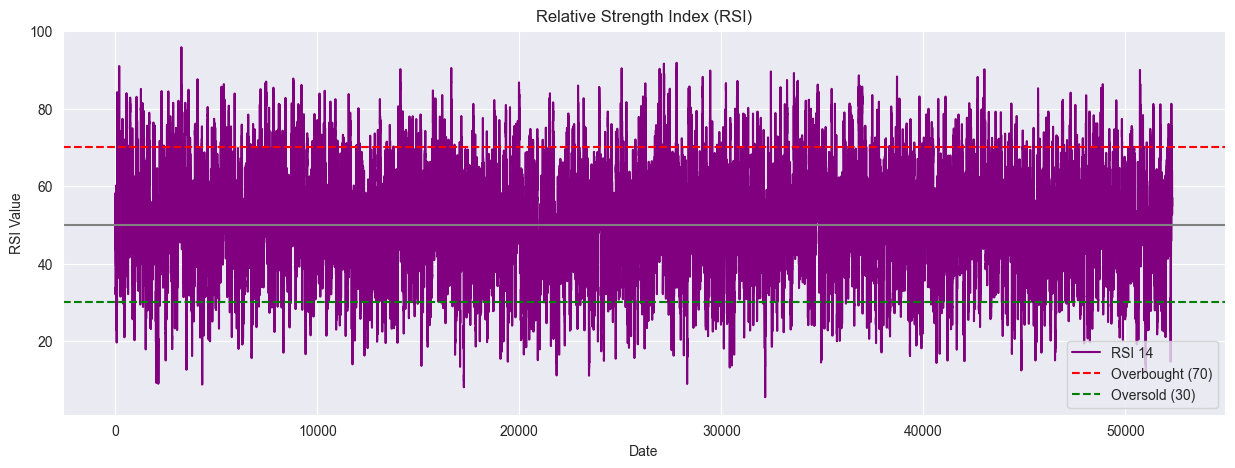

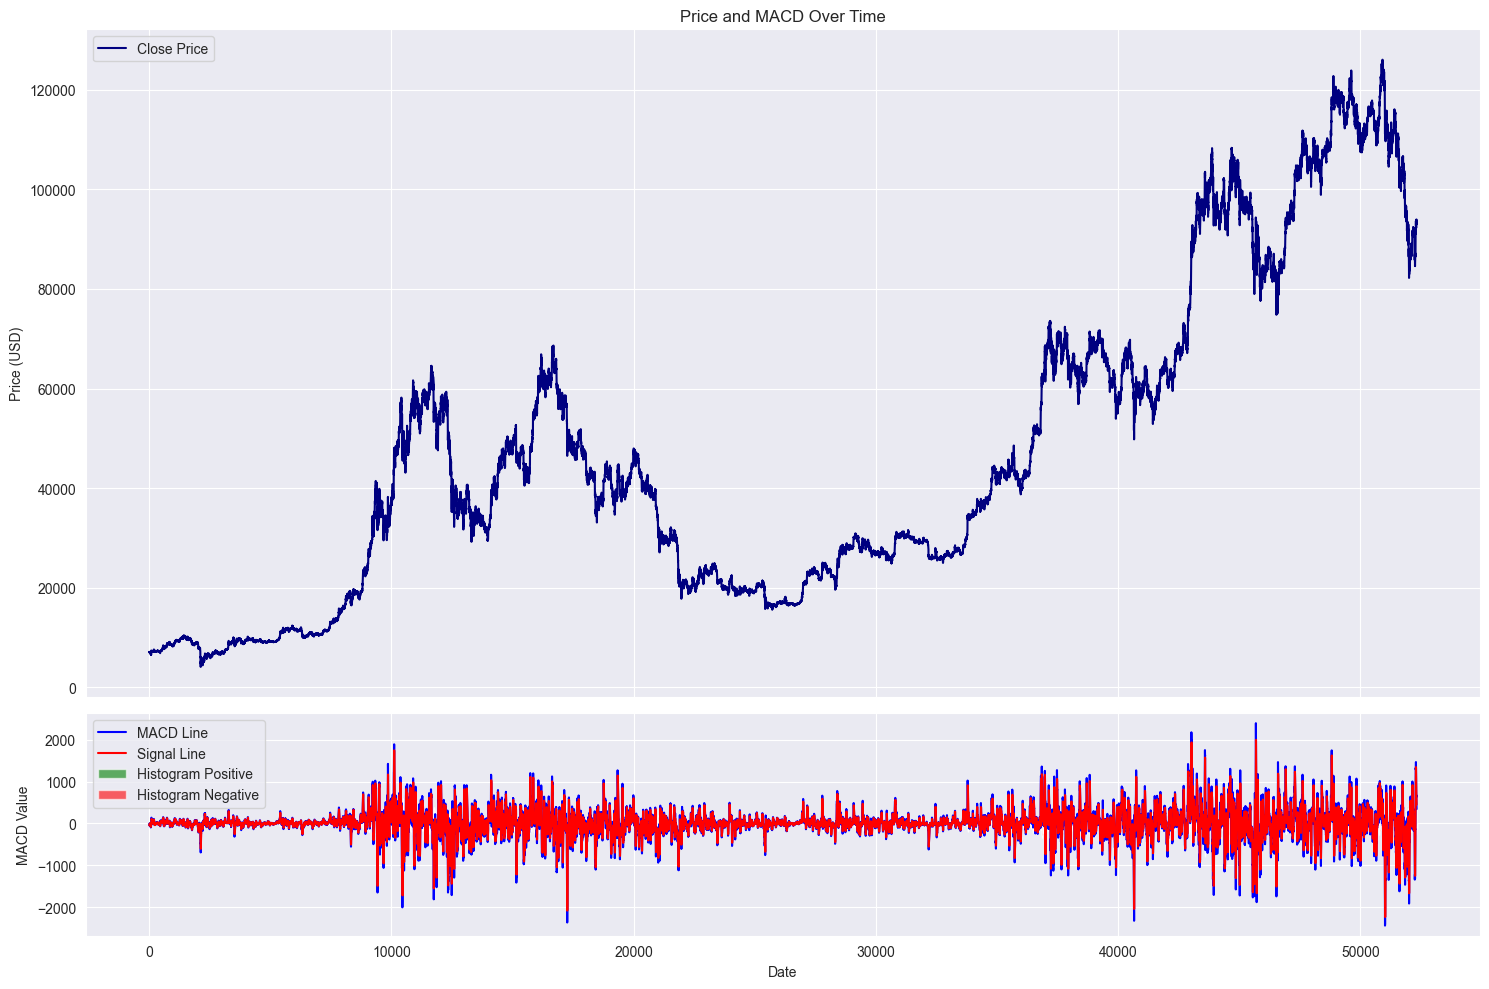

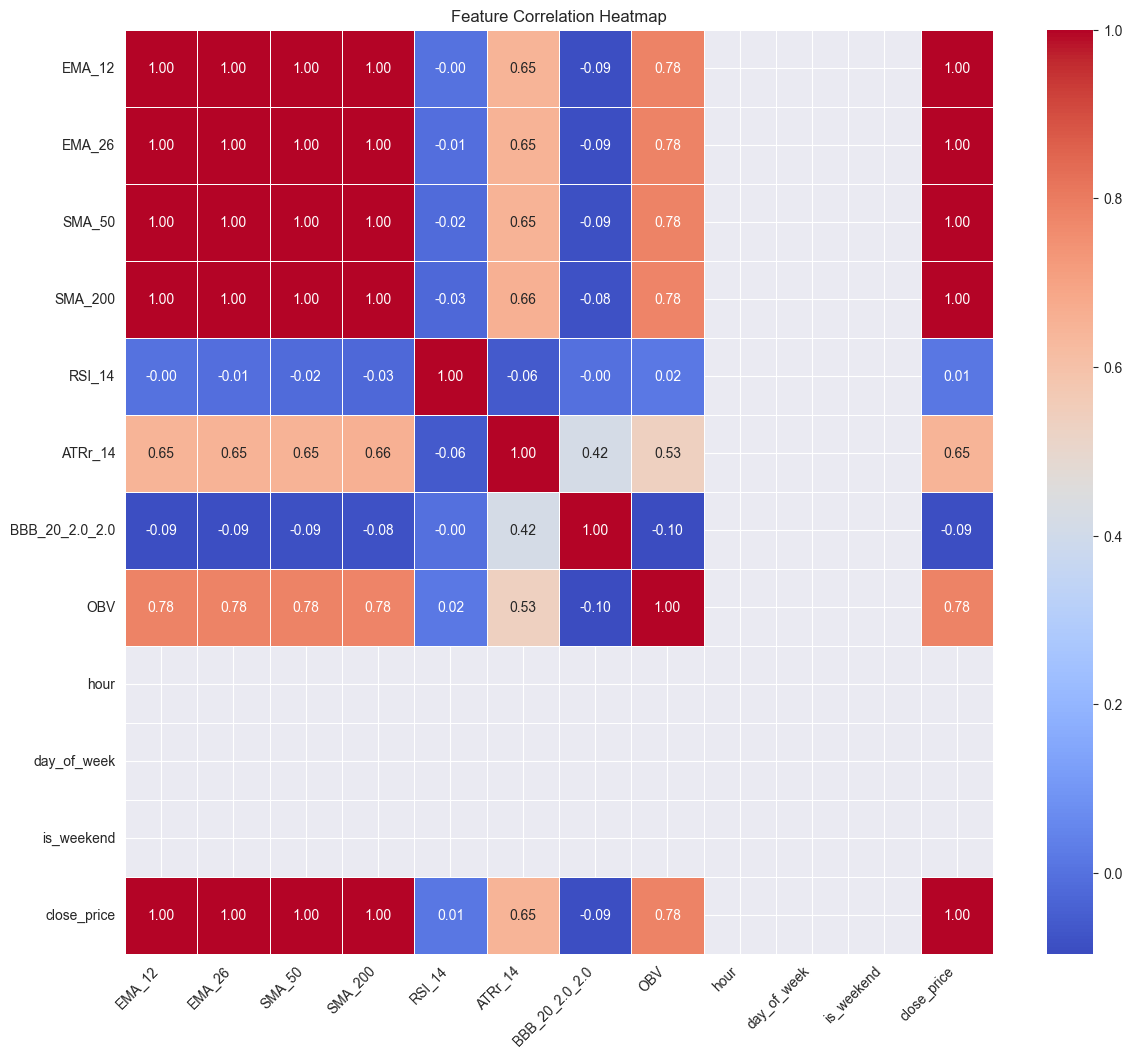

In [13]:
import seaborn as sns
import numpy as np

# Assuming 'df' is your DataFrame after running the feature engineering function
# For demonstration purposes, we'll create a dummy DataFrame structure that matches yours:
# df = ... (your actual DataFrame load and feature engineering code should go here) ...
# df = df.dropna() # Ensure your DF is clean before plotting

def visualize_crypto_features(df):
    
    # Set up plot styling
    sns.set_style("darkgrid")
    plt.rcParams["figure.figsize"] = (15, 10)

    # --- 1. Price vs. Volume (with OBV) ---
    fig, axes = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})
    
    # Price Plot
    axes[0].plot(df.index, df['close'], label='Close Price', color='blue')
    axes[0].set_title('Price, Volume, and OBV Over Time')
    axes[0].set_ylabel('Price (USD)')
    axes[0].legend(loc='upper left')

    # Volume Plot
    axes[1].bar(df.index, df['volume'], color='gray', alpha=0.6, label='Volume')
    axes[1].set_ylabel('Volume')
    axes[1].legend(loc='upper left')
    
    # OBV Plot
    axes[2].plot(df.index, df['OBV'], label='OBV', color='purple')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('OBV Value')
    axes[2].legend(loc='upper left')

    plt.tight_layout()
    plt.show()

    # --- 2. RSI Chart ---
    plt.figure(figsize=(15, 5))
    plt.plot(df.index, df['RSI_14'], label='RSI 14', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.axhline(50, color='gray', linestyle='-')
    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI Value')
    plt.legend()
    plt.show()

    # --- 3. MACD Visualization ---
    fig, axes_macd = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

    # Price Plot (Top Subplot)
    axes_macd[0].plot(df.index, df['close'], label='Close Price', color='navy')
    axes_macd[0].set_title('Price and MACD Over Time')
    axes_macd[0].set_ylabel('Price (USD)')
    axes_macd[0].legend(loc='upper left')

    # MACD Plot (Bottom Subplot)
    axes_macd[1].plot(df.index, df['MACD_12_26_9'], label='MACD Line', color='blue')
    axes_macd[1].plot(df.index, df['MACDs_12_26_9'], label='Signal Line', color='red')
    
    # Color the MACD Histogram bars based on positive/negative values
    pos_hist = df['MACDh_12_26_9'] > 0
    neg_hist = df['MACDh_12_26_9'] <= 0
    axes_macd[1].bar(df.index[pos_hist], df['MACDh_12_26_9'][pos_hist], color='green', alpha=0.6, label='Histogram Positive')
    axes_macd[1].bar(df.index[neg_hist], df['MACDh_12_26_9'][neg_hist], color='red', alpha=0.6, label='Histogram Negative')
    
    axes_macd[1].set_xlabel('Date')
    axes_macd[1].set_ylabel('MACD Value')
    axes_macd[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()

    # --- 4. Correlation Heatmap ---
    
    # Select only the numerical feature columns for the heatmap
    feature_columns = [
        "EMA_12", "EMA_26", "SMA_50", "SMA_200", "RSI_14", "ATRr_14", 
        "BBB_20_2.0_2.0", "OBV", "hour", "day_of_week", "is_weekend"
    ]
    # Add 'close' price to see how features correlate with price itself
    plot_df = df[feature_columns].copy()
    plot_df['close_price'] = df['close'] 

    corr_matrix = plot_df.corr()
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
    plt.title('Feature Correlation Heatmap')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# To use these plots, ensure your 'df' is loaded and processed:
# Example of how you might call this function:
# from src.data.preprocess import prepare_dataset
# from src.features.technical import add_technical_features
# 
# raw_df = pd.read_parquet('data/raw/btc_1h.parquet')
# processed_df = add_technical_features(raw_df)
visualize_crypto_features(df)


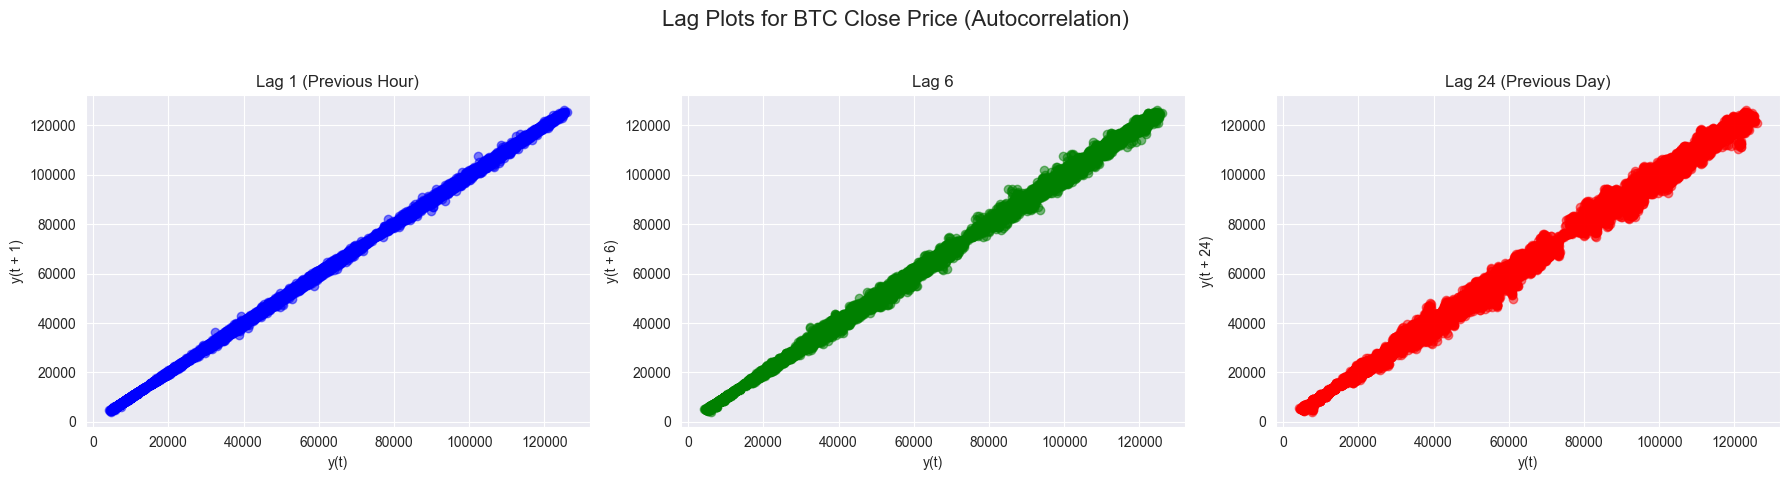

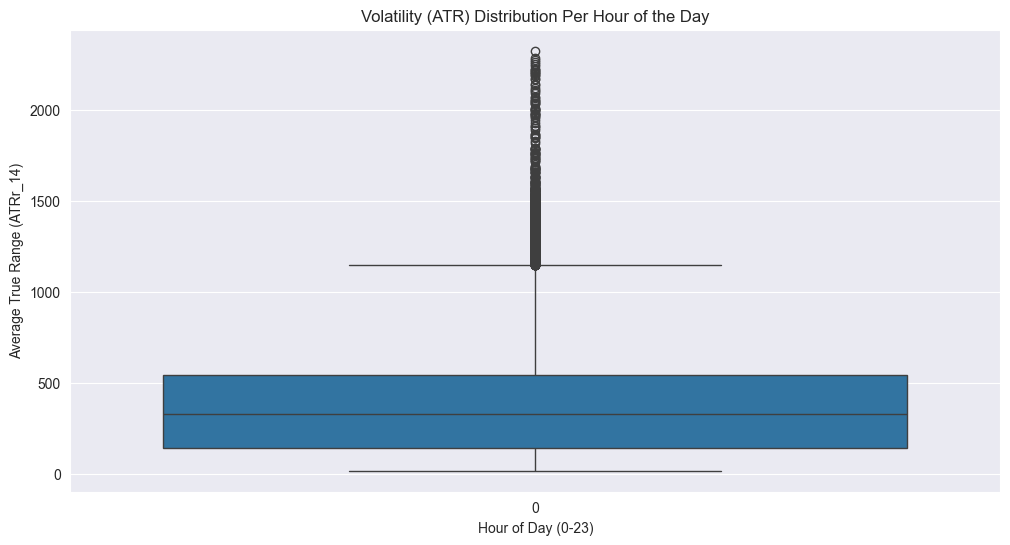

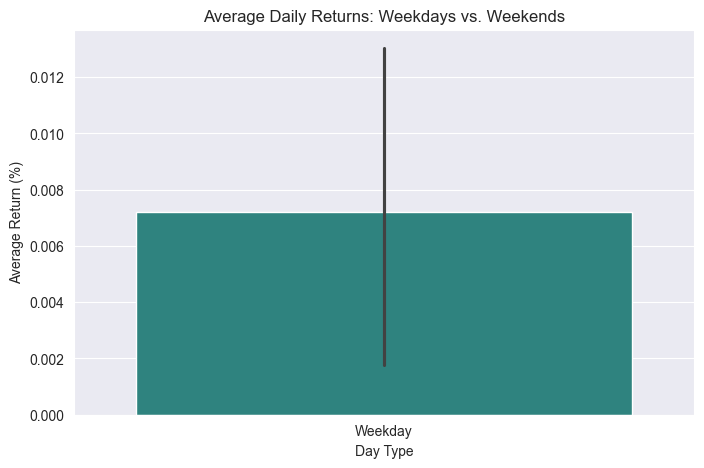

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import lag_plot # Special plot function from pandas

# Assuming 'df' is your DataFrame after running the feature engineering function

def visualize_lag_and_box_plots(df):
    
    sns.set_style("darkgrid")

    # --- 1. Lag Plots (Autocorrelation Analysis) ---

    # A lag plot shows how the current price (Y-axis) relates to the price N periods ago (X-axis).
    # If the points form a clear line, there is high autocorrelation and predictability.

    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=False, sharey=False)
    fig.suptitle('Lag Plots for BTC Close Price (Autocorrelation)', fontsize=16)

    # Lag 1 (Previous hour)
    lag_plot(df['close'], lag=1, ax=axes[0], c='blue', alpha=0.5)
    axes[0].set_title('Lag 1 (Previous Hour)')

    # Lag 6 (6 hours ago)
    lag_plot(df['close'], lag=6, ax=axes[1], c='green', alpha=0.5)
    axes[1].set_title('Lag 6')

    # Lag 24 (Previous day)
    lag_plot(df['close'], lag=24, ax=axes[2], c='red', alpha=0.5)
    axes[2].set_title('Lag 24 (Previous Day)')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    
    # --- 2. Box Plots/Bar Charts (Time-Based Analysis) ---

    # We want to look at volatility (ATRr_14) or price changes across different times.
    # We will look at the distribution of the average true range per hour of the day.

    plt.figure(figsize=(12, 6))
    
    # Ensure columns exist in the DataFrame
    if 'hour' in df.columns and 'ATRr_14' in df.columns:
        sns.boxplot(x='hour', y='ATRr_14', data=df)
        plt.title('Volatility (ATR) Distribution Per Hour of the Day')
        plt.xlabel('Hour of Day (0-23)')
        plt.ylabel('Average True Range (ATRr_14)')
        plt.show()
    else:
        print("Required columns 'hour' or 'ATRr_14' not found for box plot.")


    # We can also look at the mean price change (return) for weekends vs weekdays

    # First, calculate a simple return percentage for the plot
    df['returns'] = df['close'].pct_change() * 100
    
    plt.figure(figsize=(8, 5))

    if 'is_weekend' in df.columns and 'returns' in df.columns:
        # Map 0/1 to meaningful labels for the plot
        df['Day Type'] = df['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})
        
        sns.barplot(x='Day Type', y='returns', data=df, estimator=np.mean, palette='viridis', hue='Day Type', # Assign the same variable to 'hue' as to 'x'
            legend=False)    # Hide the redundant legend this creates)
        plt.title('Average Daily Returns: Weekdays vs. Weekends')
        plt.ylabel('Average Return (%)')
        plt.show()
    else:
        print("Required columns 'is_weekend' or 'returns' not found for bar plot.")


# To use these plots, ensure your 'df' is loaded and processed:
# Example of how you might call this function:
# from src.data.preprocess import prepare_dataset
# from src.features.technical import add_technical_features
# 
# raw_df = pd.read_parquet('data/raw/btc_1h.parquet')
# processed_df = add_technical_features(raw_df)
visualize_lag_and_box_plots(df)
